# Ideas & Stuff that needs to be done:
- Good data splits
- Feature Importance
- Comparison of uncomplicated vs. complicated
- Do result visualization (e.g. ROC/AUC)
- Feature Selection comparison
- Include recommendations based on predictions

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
features = pd.read_csv('all_uti_features.csv', index_col = 'example_id')
prescrip = pd.read_csv('all_prescriptions.csv', index_col = 'example_id')
resistance = pd.read_csv('all_uti_resist_labels.csv', index_col = 'example_id')

### For us, resistance to SXT and CIP is the target variable to predict!

In [4]:
cip_df = resistance[resistance['uncomplicated'] == 1][['CIP']].join(features)

## Divide into train & test data

- Don't touch the test data afterwards!
- Avoid having the same person in train & test data -> data leakage 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
cip_df = cip_df.drop(cip_df.columns[cip_df.columns.str.contains('selected micro - ', regex=True, na=True)], axis = 1)

In [43]:
cip_y = cip_df[['CIP']]
cip_X = cip_df.drop('CIP', axis = 1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(cip_X, cip_y)

In [45]:
X_train['CIP'] = y_train['CIP']
X_test['CIP'] = y_test['CIP']

C:\Users\benne\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\benne\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
X_train.dropna(inplace = True)
X_test.dropna(inplace = True)

C:\Users\benne\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\benne\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
y_train = X_train['CIP']
X_train = X_train.drop('CIP', axis = 1)
y_test = X_test['CIP']
X_test = X_test.drop('CIP', axis = 1)

## Feature Reduction

#### Eliminate sparse binary features

In [48]:
for feature in X_train.columns:
    if X_train[feature].unique().shape[0] == 2: # Check if variable is binary
        if (X_train[feature].sum() / X_train.shape[0]) <= 0.005: # Check if positive patients are sparse
            print(X_train[[feature]].sum())
            X_train.drop(feature, axis = 1, inplace = True)
            X_test.drop(feature, axis = 1, inplace = True)

demographics - is_veteran    40.0
dtype: float64
micro - prev resistance LVX 14    2.0
dtype: float64
micro - prev resistance AMP 14    9.0
dtype: float64
micro - prev resistance CFZ 14    9.0
dtype: float64
micro - prev resistance NIT 14    2.0
dtype: float64
micro - prev resistance GEN 14    4.0
dtype: float64
micro - prev resistance SXT 14    4.0
dtype: float64
micro - prev resistance TET 14    4.0
dtype: float64
micro - prev resistance AMC 14    1.0
dtype: float64
micro - prev resistance CIP 14    3.0
dtype: float64
micro - prev resistance SAM 14    4.0
dtype: float64
micro - prev resistance ERY 30    9.0
dtype: float64
micro - prev resistance OXA 30    6.0
dtype: float64
micro - prev resistance QUD 30    4.0
dtype: float64
micro - prev resistance RIF 30    2.0
dtype: float64
micro - prev resistance PEN 30    6.0
dtype: float64
micro - prev resistance LVX 30    20.0
dtype: float64
micro - prev resistance CLI 30    1.0
dtype: float64
micro - prev resistance DOX 30    1.0
dtype: floa

medication 14 - amoxicillin    36.0
dtype: float64
medication 14 - cephalexin    9.0
dtype: float64
medication 14 - dicloxacillin    4.0
dtype: float64
medication 14 - penicillin    18.0
dtype: float64
medication 14 - ceftazidime    1.0
dtype: float64
medication 14 - cefpodoxime    3.0
dtype: float64
medication 14 - erythromycin    2.0
dtype: float64
medication 14 - clarithromycin    6.0
dtype: float64
medication 14 - moxifloxacin    1.0
dtype: float64
medication 14 - fosfomycin    2.0
dtype: float64
medication 14 - cefuroxime    2.0
dtype: float64
medication 14 - minocycline    3.0
dtype: float64
medication 14 - rifampin    1.0
dtype: float64
medication 14 - cefadroxil    1.0
dtype: float64
ab subtype 14 - beta_lactam_combo    18.0
dtype: float64
ab subtype 14 - penicillins    54.0
dtype: float64
ab subtype 14 - cephalosporin_gen1    11.0
dtype: float64
ab subtype 14 - antistaphylococcal    4.0
dtype: float64
ab subtype 14 - cephalosporin_gen3    4.0
dtype: float64
ab subtype 14 - cep

medication ALL - linezolid    23.0
dtype: float64
medication ALL - cefaclor    8.0
dtype: float64
medication ALL - caspofungin    2.0
dtype: float64
medication ALL - polymyxin_b    27.0
dtype: float64
medication ALL - amphotericin_b    17.0
dtype: float64
medication ALL - cefprozil    4.0
dtype: float64
ab subtype ALL - carbapenem    17.0
dtype: float64
ab subtype ALL - echinocandin    7.0
dtype: float64
ab subtype ALL - polyene    17.0
dtype: float64
micro - prev organism Escherichia 14    9.0
dtype: float64
micro - prev organism Klebsiella 14    3.0
dtype: float64
micro - prev organism Enterococcus 30    5.0
dtype: float64
micro - prev organism Staphylococcus 30    2.0
dtype: float64
micro - prev organism Klebsiella 30    9.0
dtype: float64
micro - prev organism Proteus 30    7.0
dtype: float64
micro - prev organism Staph_coag_neg 30    8.0
dtype: float64
micro - prev organism Enterobacter 30    3.0
dtype: float64
micro - prev organism Citrobacter 30    2.0
dtype: float64
micro - pre

In [49]:
X_train.columns

Index(['demographics - age', 'demographics - is_white',
       'micro - prev resistance AMP 30', 'micro - prev resistance CFZ 30',
       'micro - prev resistance STRS 30', 'micro - prev resistance FOX 30',
       'micro - prev resistance AMC 90', 'micro - prev resistance AMP 90',
       'micro - prev resistance CIP 90', 'micro - prev resistance SXT 90',
       ...
       'procedure 180 - had surgery', 'custom 7 - nursing home',
       'custom 14 - nursing home', 'custom 30 - nursing home',
       'custom 90 - nursing home', 'hosp ward - ER', 'hosp ward - IP',
       'hosp ward - OP', 'is_train', 'uncomplicated'],
      dtype='object', length=252)

## Feature Selection

C:\Users\benne\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\benne\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


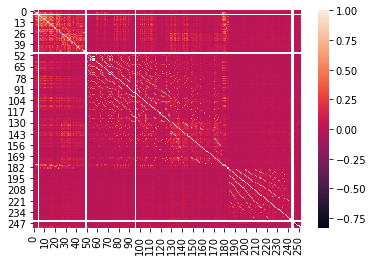

In [50]:
sns.heatmap(np.corrcoef(X_train.join(y_train), rowvar = False))

In [51]:
np.corrcoef(X_train.join(y_train), rowvar = False)[X_train.shape[1]]

array([ 4.54166538e-02, -3.28850866e-02,  5.47283225e-02,  6.42325539e-02,
                   nan,             nan,  9.82648058e-02,  1.19409802e-01,
        2.44670416e-01,  1.44248281e-01,  1.15424289e-01,  9.46841904e-02,
        2.41029891e-01,  3.38335671e-02,             nan,  2.92696266e-01,
        1.49746834e-01,  1.07602233e-01,  2.97259572e-01,  1.43228312e-01,
        2.61170524e-02,  9.35185878e-03,  1.32327082e-01,  1.08811510e-01,
        5.28867275e-02,  1.65284582e-01,  6.58784780e-02,  6.34807675e-02,
        4.23152381e-02,  2.46725951e-01,  3.50712187e-02,  1.87648025e-02,
        9.75916184e-02,  1.08986363e-01,  2.52550119e-01,  1.15211063e-01,
        2.81204480e-02,  4.23096353e-02,  5.37841434e-02,  5.68358105e-02,
        1.74411084e-02,  9.37055328e-02,  1.05519580e-01,  1.12251168e-01,
        6.97569468e-02,  1.24495946e-01,  6.45104708e-02,  6.05574214e-02,
                   nan,             nan,             nan,  1.06865865e-01,
        1.50078988e-02,  

In [52]:
from sklearn.decomposition import PCA

In [53]:
reduced = PCA(n_components = 0.9).fit_transform(X = cip_df.drop('CIP', axis = 1))

In [54]:
pd.DataFrame(reduced, index = cip_df.index)

,0
example_id,
4,-12.995031
31,-15.001058
34,2.003983
36,-8.006641
48,19.988734
...,...
116880,-12.000631
116884,-14.998214
116890,-11.986980


## Construct "Blackbox" Models

Models to test & tune: 
- XGBoost
- Neural Net
- Random Forest
- Ensembles of all of them

In [55]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [56]:
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

In [57]:
xgb_mod = xgb.XGBClassifier(objective = 'binary:logistic')

In [58]:
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search_first = RandomizedSearchCV(xgb_mod, param_distributions=params, scoring = 'roc_auc', random_state=42, n_iter=5, cv=3, verbose=1, n_jobs=7, return_train_score=True)

search_first.fit(X_train, y_train)

report_best_scores(search_first.cv_results_, 1)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  15 out of  15 | elapsed:   18.6s finished
C:\Users\benne\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model with rank: 1
Mean validation score: 0.654 (std: 0.013)
Parameters: {'colsample_bytree': 0.8835558684167137, 'gamma': 0.06974693032602092, 'learning_rate': 0.11764339456056544, 'max_depth': 5, 'n_estimators': 114, 'subsample': 0.7824279936868144}



In [59]:
search_first.best_score_

0.6540395642351788

In [60]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score

In [61]:
accuracy_score(pd.DataFrame(search_first.predict(X_test)), y_test)

0.9438259109311741

In [62]:
roc_auc_score(search_first.predict(X_test), y_test)

0.7892181911088401

In [63]:
f1_score(search_first.predict(X_test), y_test)

0.17777777777777778

In [64]:
confusion_matrix(search_first.predict(X_test), y_test)

array([[3706,  208],
       [  14,   24]], dtype=int64)

In [65]:
from sklearn.linear_model import LogisticRegression


In [66]:
lr = LogisticRegression().fit(X_train, y_train)

C:\Users\benne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [67]:
accuracy_score(lr.predict(X_test), y_test)

0.9438259109311741

In [68]:
roc_auc_score(lr.predict(X_test), y_test)

0.786042944785276

In [69]:
f1_score(lr.predict(X_test), y_test)

0.1838235294117647

In [70]:
confusion_matrix(lr.predict(X_test), y_test)

array([[3705,  207],
       [  15,   25]], dtype=int64)

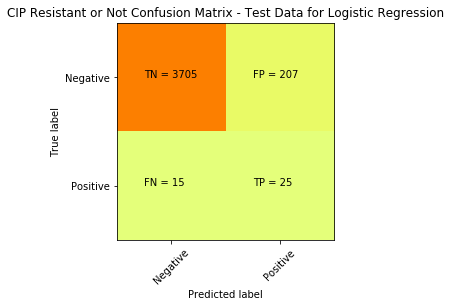

In [71]:
cm = confusion_matrix(lr.predict(X_test), y_test)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('CIP Resistant or Not Confusion Matrix - Test Data for Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j-0.25,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [74]:
accuracy_score(rf.predict(X_test), y_test)

0.9412955465587044

In [75]:
f1_score(rf.predict(X_test), y_test)

0.1773049645390071

In [76]:
confusion_matrix(rf.predict(X_test), y_test)

array([[3695,  207],
       [  25,   25]], dtype=int64)

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

[15:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

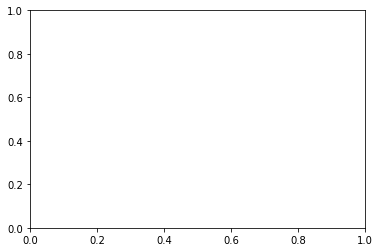

In [98]:
import graphviz
mod_xgb = xgb.XGBClassifier(objective = 'binary:logistic').fit(X_train, y_train)
xgb.plot_tree(mod_xgb)